# Implementing Reinforcement Learning
The implementation of Reinforcement learning has been inspired from the similar implementation of Q-learning in Lab 11 of this course. In Lab 11, Q-learning is applied to two environments provided by OpenAI Gym - FrozenLake-v1 and Taxi-v3. We have utilized a similar approach for Q-learning implementation in our case, using the code from the lab as a reference and adding further functionality as required. The environments selected are "**Blackjack-v1**" and "**MountainCar-v0**".


*   **Blackjack-v1** is a simple card game where the goal is to gather cards worth a total value close to 21, but not above it. The environment has discrete state and action spaces.
*   **MountainCar-v0** is a control problem where the goal is to drive an under power car on a steep hill. This environment has a continuous state space and discrete action space.



In [1]:
# Installing the relevant packages
!pip install gym
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.2 MB/s eta 0:00:00


# Implement Q-learning for Black Jack - Reinforcement Learning

Episode 1000/500000: Total Reward: 1.0 | Epsilon: 0.9512282354250445 | Success Rate: 0.439
Episode 2000/500000: Total Reward: -1.0 | Epsilon: 0.9048351558698455 | Success Rate: 0.449
Episode 3000/500000: Total Reward: -1.0 | Epsilon: 0.8607047486686187 | Success Rate: 0.422
Episode 4000/500000: Total Reward: 1.0 | Epsilon: 0.8187266592980071 | Success Rate: 0.432
Episode 5000/500000: Total Reward: -1.0 | Epsilon: 0.7787959154194843 | Success Rate: 0.398
Episode 6000/500000: Total Reward: -1.0 | Epsilon: 0.7408126643807084 | Success Rate: 0.414
Episode 7000/500000: Total Reward: -1.0 | Epsilon: 0.7046819235193887 | Success Rate: 0.396
Episode 8000/500000: Total Reward: -1.0 | Epsilon: 0.6703133426452752 | Success Rate: 0.384
Episode 9000/500000: Total Reward: -1.0 | Epsilon: 0.6376209781063263 | Success Rate: 0.418
Episode 10000/500000: Total Reward: 1.0 | Epsilon: 0.6065230778740716 | Success Rate: 0.391
Episode 11000/500000: Total Reward: -1.0 | Epsilon: 0.5769418771107209 | Success R

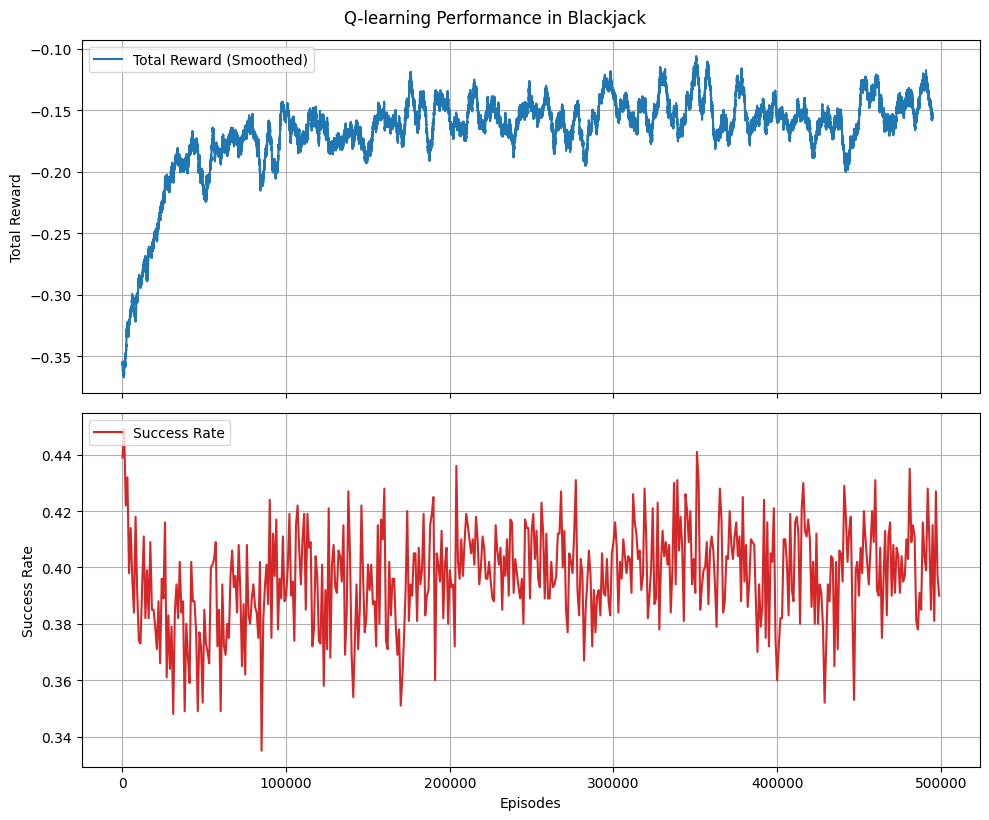

In [2]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

def epsilon_greedy_policy(Q, state, nA, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(nA)
    else:
        return np.argmax(Q[state])

def Q_learning(env, num_episodes, step_size=0.1, gamma=1.0, epsilon_start=1.0, epsilon_decay=0.99995, epsilon_min=0.1):
    nA = env.action_space.n
    Q = np.zeros((32, 11, 2, nA))

    epsilon = epsilon_start
    rewards_per_episode = []
    success_rates = []

    for i in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = epsilon_greedy_policy(Q, state, nA, epsilon)
            next_state, reward, done, truncated, _ = env.step(action)
            total_reward += reward

            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += step_size * td_delta

            state = next_state

            if done or truncated:
                break

        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        rewards_per_episode.append(total_reward)

        if (i + 1) % 1000 == 0:
            success_rate = test_policy(env, determine_policy_from_Q(Q), num_episodes=1000)
            success_rates.append(success_rate)
            print(f"Episode {i+1}/{num_episodes}: Total Reward: {total_reward} | Epsilon: {epsilon} | Success Rate: {success_rate}")

    return Q, rewards_per_episode, success_rates

def determine_policy_from_Q(Q):
    policy = np.zeros((32, 11, 2), dtype=int)
    for i in range(32):
        for j in range(11):
            for k in range(2):
                policy[i, j, k] = np.argmax(Q[i, j, k])
    return policy

def test_policy(env, policy, num_episodes=1000):
    wins = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = policy[state]
            next_state, reward, done, truncated, _ = env.step(action)
            state = next_state
            if done or truncated:
                if reward > 0:
                    wins += 1
                break
    return wins / num_episodes

def plot_results(rewards, success_rates):
    window_size = 5000
    rewards_smoothed = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    ax1.plot(rewards_smoothed, color='tab:blue', label='Total Reward (Smoothed)')
    ax1.set_ylabel('Total Reward')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    ax2.plot(np.arange(len(success_rates)) * 1000, success_rates, color='tab:red', label='Success Rate')
    ax2.set_xlabel('Episodes')
    ax2.set_ylabel('Success Rate')
    ax2.legend(loc='upper left')
    ax2.grid(True)

    fig.tight_layout()
    plt.suptitle('Q-learning Performance in Blackjack', y=1.02)
    plt.show()

if __name__ == "__main__":
    env = gym.make("Blackjack-v1")

    num_episodes = 500_000
    step_size = 0.05
    Q, rewards_per_episode, success_rates = Q_learning(env, num_episodes, step_size=step_size, gamma=1.0, epsilon_start=1.0, epsilon_decay=0.99995, epsilon_min=0.1)
    policy = determine_policy_from_Q(Q)

    success_rate = test_policy(env, policy, num_episodes=10000)
    print(f"Success rate: {success_rate}")
    print("Optimal Policy (State -> Action):")
    print(policy)

    plot_results(rewards_per_episode, success_rates)

    env.close()


### Observations

From the results received above, it can be observed that initially the reward is negative indicating that the agent is not performing well. As the number of episodes increase, the reward improves as well and is stabilizing around a less negative value. However, there is still fluctutation in the reward, which shows that the agent's performance still needs improvement.

Looking at the success rate plot, it shows fluctutations around 39% throughout, reflecting that the agent wins the game around ~ 39% of the times.

## Hyperparameter Optimization for Black Jack Environment

In [3]:
from itertools import product

def epsilon_greedy_policy(Q, state, nA, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(nA)
    else:
        return np.argmax(Q[state])

def Q_learning(env, num_episodes, step_size, gamma, epsilon_start, epsilon_decay, epsilon_min):
    nA = env.action_space.n
    Q = np.zeros((32, 11, 2, nA))

    epsilon = epsilon_start
    rewards_per_episode = []
    success_rates = []

    for i in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = epsilon_greedy_policy(Q, state, nA, epsilon)
            next_state, reward, done, truncated, _ = env.step(action)
            total_reward += reward

            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += step_size * td_delta

            state = next_state

            if done or truncated:
                break

        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        rewards_per_episode.append(total_reward)

        if (i + 1) % 1000 == 0:
            success_rate = test_policy(env, determine_policy_from_Q(Q), num_episodes=1000)
            success_rates.append(success_rate)

    return Q, rewards_per_episode, success_rates

def determine_policy_from_Q(Q):
    policy = np.zeros((32, 11, 2), dtype=int)
    for i in range(32):
        for j in range(11):
            for k in range(2):
                policy[i, j, k] = np.argmax(Q[i, j, k])
    return policy

def test_policy(env, policy, num_episodes=1000):
    wins = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = policy[state]
            next_state, reward, done, truncated, _ = env.step(action)
            state = next_state
            if done or truncated:
                if reward > 0:
                    wins += 1
                break
    return wins / num_episodes

def plot_results(rewards, success_rates):
    window_size = 5000
    rewards_smoothed = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    ax1.plot(rewards_smoothed, color='tab:blue', label='Total Reward (Smoothed)')
    ax1.set_ylabel('Total Reward')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    ax2.plot(np.arange(len(success_rates)) * 1000, success_rates, color='tab:red', label='Success Rate')
    ax2.set_xlabel('Episodes')
    ax2.set_ylabel('Success Rate')
    ax2.legend(loc='upper left')
    ax2.grid(True)

    fig.tight_layout()
    plt.suptitle('Q-learning Performance in Blackjack', y=1.02)
    plt.show()

def grid_search(env, num_episodes, param_grid):
    best_success_rate = 0
    best_params = None
    results = []

    for params in product(*param_grid.values()):
        step_size, gamma, epsilon_start, epsilon_decay, epsilon_min = params
        print(f"Testing parameters: step_size={step_size}, gamma={gamma}, epsilon_start={epsilon_start}, epsilon_decay={epsilon_decay}, epsilon_min={epsilon_min}")
        Q, rewards_per_episode, success_rates = Q_learning(env, num_episodes, step_size, gamma, epsilon_start, epsilon_decay, epsilon_min)
        success_rate = test_policy(env, determine_policy_from_Q(Q), num_episodes=10000)
        results.append((params, success_rate))

        if success_rate > best_success_rate:
            best_success_rate = success_rate
            best_params = params

        print(f"Success rate: {success_rate} with parameters: {params}")

    return best_params, best_success_rate, results

if __name__ == "__main__":
    env = gym.make("Blackjack-v1")

    num_episodes = 500_000
    param_grid = {
        'step_size': [0.01, 0.05, 0.1],
        'gamma': [0.9, 0.95, 1.0],
        'epsilon_start': [1.0],
        'epsilon_decay': [0.9999, 0.99995],
        'epsilon_min': [0.1, 0.01]
    }

    best_params, best_success_rate, results = grid_search(env, num_episodes, param_grid)

    print(f"Best success rate: {best_success_rate} with parameters: {best_params}")

    env.close()


Testing parameters: step_size=0.01, gamma=0.9, epsilon_start=1.0, epsilon_decay=0.9999, epsilon_min=0.1
Success rate: 0.3761 with parameters: (0.01, 0.9, 1.0, 0.9999, 0.1)
Testing parameters: step_size=0.01, gamma=0.9, epsilon_start=1.0, epsilon_decay=0.9999, epsilon_min=0.01
Success rate: 0.372 with parameters: (0.01, 0.9, 1.0, 0.9999, 0.01)
Testing parameters: step_size=0.01, gamma=0.9, epsilon_start=1.0, epsilon_decay=0.99995, epsilon_min=0.1
Success rate: 0.3961 with parameters: (0.01, 0.9, 1.0, 0.99995, 0.1)
Testing parameters: step_size=0.01, gamma=0.9, epsilon_start=1.0, epsilon_decay=0.99995, epsilon_min=0.01
Success rate: 0.3967 with parameters: (0.01, 0.9, 1.0, 0.99995, 0.01)
Testing parameters: step_size=0.01, gamma=0.95, epsilon_start=1.0, epsilon_decay=0.9999, epsilon_min=0.1
Success rate: 0.3684 with parameters: (0.01, 0.95, 1.0, 0.9999, 0.1)
Testing parameters: step_size=0.01, gamma=0.95, epsilon_start=1.0, epsilon_decay=0.9999, epsilon_min=0.01
Success rate: 0.378 with 

## Reinforcement Learning For MountainCar-v0

In [5]:
import gym
import numpy as np

# Function to discretise the continuous state space of the environment
def discretize_state(state, env, n_bins=18):
    """ Discretize the continuous state space. """
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    bin_width = (env_high - env_low) / n_bins

    # Discretize each component of the state
    state_disc = (state - env_low) / bin_width

    # Clamp to avoid out-of-bounds index
    state_disc = np.clip(state_disc, 0, n_bins - 1)

    # Convert to integer
    state_disc = tuple(state_disc.astype(int))

    # Calculate flat index from multidimensional index
    return np.ravel_multi_index(state_disc, (n_bins, n_bins))

# Function to create and initialise the Q-table with zeros
def create_q_table(n_bins, n_actions):
    """ Create and initialize the Q-table with all zeros. """
    return np.zeros((n_bins ** 2, n_actions))

# Function to perform Q-learning
def q_learning(env, episodes, step_size, gamma, epsilon, min_epsilon, decay_rate):
    n_bins = 18
    n_actions = env.action_space.n
    Q = create_q_table(n_bins, n_actions)
    success_count = 0

    for episode in range(episodes):
        state_raw = env.reset()
        state = discretize_state(state_raw, env, n_bins)
        done = False
        total_reward = 0

        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            next_state_raw, reward, done, _ = env.step(action)
            next_state = discretize_state(next_state_raw, env, n_bins)

            if done and next_state_raw[0] >= 0.5:  # Goal condition for MountainCar
                success_count += 1

            # Update Q-value
            Q[state, action] += step_size * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
            state = next_state
            total_reward += reward

        epsilon = max(min_epsilon, epsilon * decay_rate)  # Decay epsilon
        print(f"Episode {episode + 1}: || Total Reward: {total_reward} || e-greedy: {epsilon:.6f} || Success Rate: {success_count}/{episode + 1}")

    return Q

# Function to test the learned policy
def test_policy(env, Q, n_bins):
    """ Test the learned Q-policy. """
    state = discretize_state(env.reset(), env, n_bins)
    done = False
    total_reward = 0
    steps = 0
    success = False

    while not done:
        action = np.argmax(Q[state])
        next_state_raw, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state_raw, env, n_bins)

        if done and next_state_raw[0] >= 0.5:
            success = True

        state = next_state
        total_reward += reward
        steps += 1
        env.render()

    print(f"Finished in {steps} steps with total reward = {total_reward}")
    return success

if __name__ == "__main__":
    env = gym.make("MountainCar-v0")
    episodes = 5000
    step_size = 0.1
    gamma = 0.99
    epsilon = 1.0
    min_epsilon = 0.1
    decay_rate = 0.99
    n_bins = 18  # Number of bins for discretising each state dimension

    # Train the Q-learning model
    Q = q_learning(env, episodes, step_size, gamma, epsilon, min_epsilon, decay_rate)

    # Evaluate the trained policy
    success_count = 0
    num_tests = 100
    for _ in range(num_tests):
        success = test_policy(env, Q, n_bins)
        if success:
            success_count += 1

    print(f"Success rate: {success_count / num_tests * 100:.2f}%")

    env.close()

# Function to optimize hyperparameters
def optimize_hyperparameters():
    env = gym.make("MountainCar-v0")
    hyperparameters = [
        {'step_size': 0.1, 'gamma': 0.99, 'epsilon': 1.0, 'min_epsilon': 0.1, 'decay_rate': 0.995},
        {'step_size': 0.2, 'gamma': 0.98, 'epsilon': 1.0, 'min_epsilon': 0.1, 'decay_rate': 0.99},
        {'step_size': 0.05, 'gamma': 0.95, 'epsilon': 1.0, 'min_epsilon': 0.05, 'decay_rate': 0.995},

    ]

    best_success_rate = 0
    best_params = None

    for params in hyperparameters:
        Q = q_learning(env, 5000, **params)
        success_count = 0
        num_tests = 100
        for _ in range(num_tests):
            success = test_policy(env, Q, 18)
            if success:
                success_count += 1

        success_rate = success_count / num_tests * 100
        print(f"Parameters: {params}, Success Rate: {success_rate:.2f}%")

        if success_rate > best_success_rate:
            best_success_rate = success_rate
            best_params = params

    print(f"Best Parameters: {best_params}, Best Success Rate: {best_success_rate:.2f}%")
    env.close()

if __name__ == "__main__":
    optimize_hyperparameters()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1: || Total Reward: -200.0 || e-greedy: 0.990000 || Success Rate: 0/1
Episode 2: || Total Reward: -200.0 || e-greedy: 0.980100 || Success Rate: 0/2
Episode 3: || Total Reward: -200.0 || e-greedy: 0.970299 || Success Rate: 0/3
Episode 4: || Total Reward: -200.0 || e-greedy: 0.960596 || Success Rate: 0/4
Episode 5: || Total Reward: -200.0 || e-greedy: 0.950990 || Success Rate: 0/5
Episode 6: || Total Reward: -200.0 || e-greedy: 0.941480 || Success Rate: 0/6
Episode 7: || Total Reward: -200.0 || e-greedy: 0.932065 || Success Rate: 0/7
Episode 8: || Total Reward: -200.0 || e-greedy: 0.922745 || Success Rate: 0/8
Episode 9: || Total Reward: -200.0 || e-greedy: 0.913517 || Success Rate: 0/9
Episode 10: || Total Reward: -200.0 || e-greedy: 0.904382 || Success Rate: 0/10
Episode 11: || Total Reward: -200.0 || e-greedy: 0.895338 || Success Rate: 0/11
Episode 12: || Total Reward: -200.0 || e-greedy: 0.886385 || Success Rate: 0/12
Episode 13: || Total Reward: -200.0 || e-greedy: 0.877521 

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Streaming output truncated to the last 5000 lines.
Episode 103: || Total Reward: -200.0 || e-greedy: 0.596729 || Success Rate: 0/103
Episode 104: || Total Reward: -200.0 || e-greedy: 0.593746 || Success Rate: 0/104
Episode 105: || Total Reward: -200.0 || e-greedy: 0.590777 || Success Rate: 0/105
Episode 106: || Total Reward: -200.0 || e-greedy: 0.587823 || Success Rate: 0/106
Episode 107: || Total Reward: -200.0 || e-greedy: 0.584884 || Success Rate: 0/107
Episode 108: || Total Reward: -200.0 || e-greedy: 0.581959 || Success Rate: 0/108
Episode 109: || Total Reward: -200.0 || e-greedy: 0.579050 || Success Rate: 0/109
Episode 110: || Total Reward: -200.0 || e-greedy: 0.576154 || Success Rate: 0/110
Episode 111: || Total Reward: -200.0 || e-greedy: 0.573274 || Success Rate: 0/111
Episode 112: || Total Reward: -200.0 || e-greedy: 0.570407 || Success Rate: 0/112
Episode 113: || Total Reward: -200.0 || e-greedy: 0.567555 || Success Rate: 0/113
Episode 114: || Total Reward: -200.0 || e-greed

## Hyperparameter Tuning for MountainCar-v0

Streaming output truncated to the last 5000 lines.
Episode 1: || Total Reward: -200.0 || e-greedy: 0.995000 || Success Rate: 0/1
Episode 2: || Total Reward: -200.0 || e-greedy: 0.990025 || Success Rate: 0/2
Episode 3: || Total Reward: -200.0 || e-greedy: 0.985075 || Success Rate: 0/3
Episode 4: || Total Reward: -200.0 || e-greedy: 0.980150 || Success Rate: 0/4
Episode 5: || Total Reward: -200.0 || e-greedy: 0.975249 || Success Rate: 0/5
Episode 6: || Total Reward: -200.0 || e-greedy: 0.970373 || Success Rate: 0/6
Episode 7: || Total Reward: -200.0 || e-greedy: 0.965521 || Success Rate: 0/7
Episode 8: || Total Reward: -200.0 || e-greedy: 0.960693 || Success Rate: 0/8
Episode 9: || Total Reward: -200.0 || e-greedy: 0.955890 || Success Rate: 0/9
Episode 10: || Total Reward: -200.0 || e-greedy: 0.951110 || Success Rate: 0/10
Episode 11: || Total Reward: -200.0 || e-greedy: 0.946355 || Success Rate: 0/11
Episode 12: || Total Reward: -200.0 || e-greedy: 0.941623 || Success Rate: 0/12
Episode

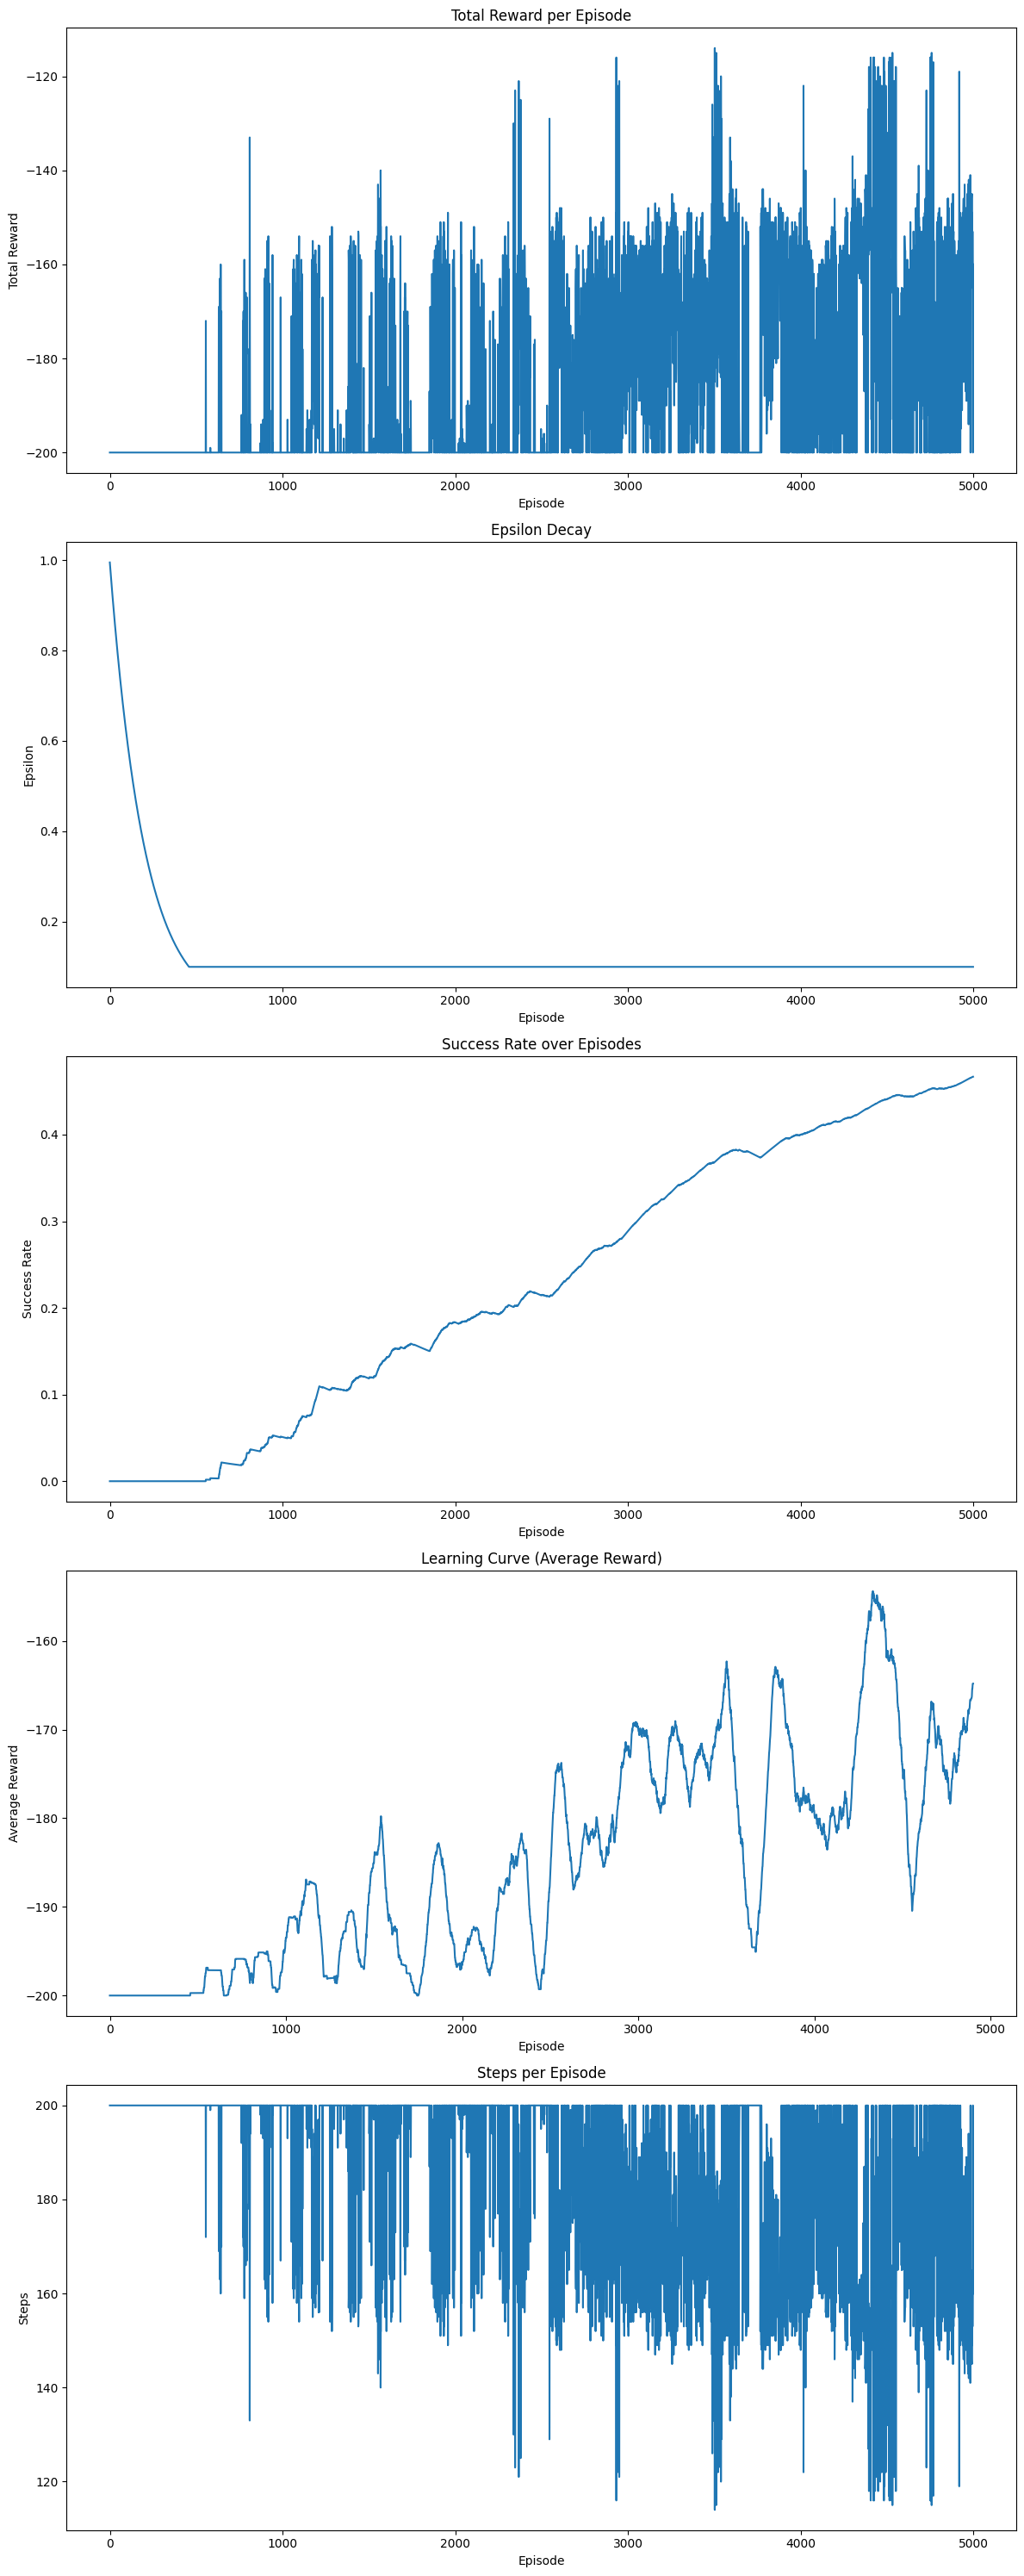

Finished in 144 steps with total reward = -144.0
Finished in 200 steps with total reward = -200.0
Finished in 141 steps with total reward = -141.0
Finished in 200 steps with total reward = -200.0
Finished in 104 steps with total reward = -104.0
Finished in 192 steps with total reward = -192.0
Finished in 155 steps with total reward = -155.0
Finished in 144 steps with total reward = -144.0
Finished in 155 steps with total reward = -155.0
Finished in 164 steps with total reward = -164.0
Finished in 200 steps with total reward = -200.0
Finished in 145 steps with total reward = -145.0
Finished in 200 steps with total reward = -200.0
Finished in 163 steps with total reward = -163.0
Finished in 143 steps with total reward = -143.0
Finished in 200 steps with total reward = -200.0
Finished in 195 steps with total reward = -195.0
Finished in 145 steps with total reward = -145.0
Finished in 142 steps with total reward = -142.0
Finished in 200 steps with total reward = -200.0
Finished in 190 step

In [ ]:
def discretize_state(state, env, n_bins=18):
    """ Discretize the continuous state space. """
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    bin_width = (env_high - env_low) / n_bins

    # Discretise each component of the state
    state_disc = (state - env_low) / bin_width

    # Clamp to avoid out-of-bounds index
    state_disc = np.clip(state_disc, 0, n_bins - 1)

    # Convert to integer
    state_disc = tuple(state_disc.astype(int))

    # Calculate flat index from multidimensional index
    return np.ravel_multi_index(state_disc, (n_bins, n_bins))

# Function to create and initialize the Q-table with zeros
def create_q_table(n_bins, n_actions):
    """ Create and initialize the Q-table with all zeros. """
    return np.zeros((n_bins ** 2, n_actions))

# Function to perform Q-learning
def q_learning(env, episodes, step_size, gamma, epsilon, min_epsilon, decay_rate):
    n_bins = 18 # Number of bins for discretizing state space
    n_actions = env.action_space.n
    Q = create_q_table(n_bins, n_actions)
    success_count = 0
    rewards = []
    epsilons = []
    success_rates = []
    steps_per_episode = []

    for episode in range(episodes):
        state_raw = env.reset()
        state = discretize_state(state_raw, env, n_bins)
        done = False
        total_reward = 0
        steps = 0
        # Epsilon-greedy policy for action selection
        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            next_state_raw, reward, done, _ = env.step(action)
            next_state = discretize_state(next_state_raw, env, n_bins)

            # Check if the goal state is reached
            if done and next_state_raw[0] >= 0.5:
                success_count += 1

            # Update Q-value using the Q-learning update rule
            Q[state, action] += step_size * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
            state = next_state
            total_reward += reward
            steps += 1

        # Decay epsilon to reduce exploration over time
        epsilon = max(min_epsilon, epsilon * decay_rate)
        rewards.append(total_reward)
        epsilons.append(epsilon)
        success_rates.append(success_count / (episode + 1))
        steps_per_episode.append(steps)

        print(f"Episode {episode + 1}: || Total Reward: {total_reward} || e-greedy: {epsilon:.6f} || Success Rate: {success_count}/{episode + 1}")

    return Q, rewards, epsilons, success_rates, steps_per_episode

# Function to test the learned policy
def test_policy(env, Q, n_bins):
    """ Test the learned Q-policy. """
    state = discretize_state(env.reset(), env, n_bins)
    done = False
    total_reward = 0
    steps = 0
    success = False

    while not done:
        action = np.argmax(Q[state])
        next_state_raw, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state_raw, env, n_bins)

        if done and next_state_raw[0] >= 0.5:  # Success condition
            success = True

        state = next_state
        total_reward += reward
        steps += 1
        env.render()

    print(f"Finished in {steps} steps with total reward = {total_reward}")
    return success

def plot_metrics(episodes, rewards, epsilons, success_rates, steps_per_episode):
    fig, axs = plt.subplots(5, 1, figsize=(12, 30))

    # Total Reward per Episode
    axs[0].plot(range(episodes), rewards)
    axs[0].set_title('Total Reward per Episode')
    axs[0].set_xlabel('Episode')
    axs[0].set_ylabel('Total Reward')

    # Epsilon Decay
    axs[1].plot(range(episodes), epsilons)
    axs[1].set_title('Epsilon Decay')
    axs[1].set_xlabel('Episode')
    axs[1].set_ylabel('Epsilon')

    # Success Rate over Episodes
    axs[2].plot(range(episodes), success_rates)
    axs[2].set_title('Success Rate over Episodes')
    axs[2].set_xlabel('Episode')
    axs[2].set_ylabel('Success Rate')

    # Learning Curve (Average Reward over a sliding window)
    window_size = 100
    moving_avg_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    axs[3].plot(range(len(moving_avg_rewards)), moving_avg_rewards)
    axs[3].set_title('Learning Curve (Average Reward)')
    axs[3].set_xlabel('Episode')
    axs[3].set_ylabel('Average Reward')

    # Steps per Episode
    axs[4].plot(range(episodes), steps_per_episode)
    axs[4].set_title('Steps per Episode')
    axs[4].set_xlabel('Episode')
    axs[4].set_ylabel('Steps')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    env = gym.make("MountainCar-v0")
    episodes = 5000
    step_size = 0.1
    gamma = 0.99
    epsilon = 1.0
    min_epsilon = 0.1
    decay_rate = 0.995
    n_bins = 18

    # Train the Q-learning model
    Q, rewards, epsilons, success_rates, steps_per_episode = q_learning(env, episodes, step_size, gamma, epsilon, min_epsilon, decay_rate)

    # Plot the metrics
    plot_metrics(episodes, rewards, epsilons, success_rates, steps_per_episode)

    # Evaluate the trained policy
    success_count = 0
    num_tests = 100
    for _ in range(num_tests):
        success = test_policy(env, Q, n_bins)
        if success:
            success_count += 1

    print(f"Success rate: {success_count / num_tests * 100:.2f}%")

    env.close()
